In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt

## Copy the loss prints from an executed notebook to the variable below:

In [2]:
loss_text = """ 

Epoch 1/100
600/600 [==============================] - 178s 126ms/step - monet_gen_loss: 4.3782 - photo_gen_loss: 4.5694 - monet_disc_loss: 0.6530 - photo_disc_loss: 0.6046
Epoch 2/100
600/600 [==============================] - 75s 125ms/step - monet_gen_loss: 3.5863 - photo_gen_loss: 3.8165 - monet_disc_loss: 0.6449 - photo_disc_loss: 0.5831
Epoch 3/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 3.3366 - photo_gen_loss: 3.4892 - monet_disc_loss: 0.6298 - photo_disc_loss: 0.6084
Epoch 4/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 3.2189 - photo_gen_loss: 3.2694 - monet_disc_loss: 0.6160 - photo_disc_loss: 0.6205
Epoch 5/100
600/600 [==============================] - 75s 125ms/step - monet_gen_loss: 3.1691 - photo_gen_loss: 3.2243 - monet_disc_loss: 0.6160 - photo_disc_loss: 0.6116
Epoch 6/100
600/600 [==============================] - 75s 125ms/step - monet_gen_loss: 3.0640 - photo_gen_loss: 3.1331 - monet_disc_loss: 0.6205 - photo_disc_loss: 0.6149
Epoch 7/100
600/600 [==============================] - 75s 125ms/step - monet_gen_loss: 2.9719 - photo_gen_loss: 3.0493 - monet_disc_loss: 0.6197 - photo_disc_loss: 0.6123
Epoch 8/100
600/600 [==============================] - 75s 126ms/step - monet_gen_loss: 2.9140 - photo_gen_loss: 3.0026 - monet_disc_loss: 0.6181 - photo_disc_loss: 0.6109
Epoch 9/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.8505 - photo_gen_loss: 2.9389 - monet_disc_loss: 0.6202 - photo_disc_loss: 0.6136
Epoch 10/100
600/600 [==============================] - 75s 126ms/step - monet_gen_loss: 2.8108 - photo_gen_loss: 2.9023 - monet_disc_loss: 0.6225 - photo_disc_loss: 0.6103
Epoch 11/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.7702 - photo_gen_loss: 2.8634 - monet_disc_loss: 0.6261 - photo_disc_loss: 0.6078
Epoch 12/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.7372 - photo_gen_loss: 2.8429 - monet_disc_loss: 0.6298 - photo_disc_loss: 0.6021
Epoch 13/100
600/600 [==============================] - 75s 125ms/step - monet_gen_loss: 2.7121 - photo_gen_loss: 2.8274 - monet_disc_loss: 0.6306 - photo_disc_loss: 0.5972
Epoch 14/100
600/600 [==============================] - 75s 126ms/step - monet_gen_loss: 2.6928 - photo_gen_loss: 2.8006 - monet_disc_loss: 0.6317 - photo_disc_loss: 0.5994
Epoch 15/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.6540 - photo_gen_loss: 2.7840 - monet_disc_loss: 0.6363 - photo_disc_loss: 0.5977
Epoch 16/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.6364 - photo_gen_loss: 2.7526 - monet_disc_loss: 0.6379 - photo_disc_loss: 0.5991
Epoch 17/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.5757 - photo_gen_loss: 2.7253 - monet_disc_loss: 0.6454 - photo_disc_loss: 0.6029
Epoch 18/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.5779 - photo_gen_loss: 2.7348 - monet_disc_loss: 0.6402 - photo_disc_loss: 0.5946
Epoch 19/100
600/600 [==============================] - 75s 125ms/step - monet_gen_loss: 2.5568 - photo_gen_loss: 2.7654 - monet_disc_loss: 0.6436 - photo_disc_loss: 0.5888
Epoch 20/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.5738 - photo_gen_loss: 2.7716 - monet_disc_loss: 0.6392 - photo_disc_loss: 0.5894
Epoch 21/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.6373 - photo_gen_loss: 2.7397 - monet_disc_loss: 0.6209 - photo_disc_loss: 0.5927
Epoch 22/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.5292 - photo_gen_loss: 2.7096 - monet_disc_loss: 0.6399 - photo_disc_loss: 0.5953
Epoch 23/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.5645 - photo_gen_loss: 2.7449 - monet_disc_loss: 0.6335 - photo_disc_loss: 0.5898
Epoch 24/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.5576 - photo_gen_loss: 2.8285 - monet_disc_loss: 0.6304 - photo_disc_loss: 0.5613
Epoch 25/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.5324 - photo_gen_loss: 2.8598 - monet_disc_loss: 0.6332 - photo_disc_loss: 0.5476
Epoch 26/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.5563 - photo_gen_loss: 2.9481 - monet_disc_loss: 0.6281 - photo_disc_loss: 0.5352
Epoch 27/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.6752 - photo_gen_loss: 3.1231 - monet_disc_loss: 0.6173 - photo_disc_loss: 0.5283
Epoch 28/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.5602 - photo_gen_loss: 2.8918 - monet_disc_loss: 0.6270 - photo_disc_loss: 0.5593
Epoch 29/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.5617 - photo_gen_loss: 2.8321 - monet_disc_loss: 0.6220 - photo_disc_loss: 0.5616
Epoch 30/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.6029 - photo_gen_loss: 2.9103 - monet_disc_loss: 0.6194 - photo_disc_loss: 0.5477
Epoch 31/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.5703 - photo_gen_loss: 2.8652 - monet_disc_loss: 0.6205 - photo_disc_loss: 0.5502
Epoch 32/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.6555 - photo_gen_loss: 3.0861 - monet_disc_loss: 0.5972 - photo_disc_loss: 0.4730
Epoch 33/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.6705 - photo_gen_loss: 3.0960 - monet_disc_loss: 0.6142 - photo_disc_loss: 0.5233
Epoch 34/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.6839 - photo_gen_loss: 3.1748 - monet_disc_loss: 0.6118 - photo_disc_loss: 0.4862
Epoch 35/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.6369 - photo_gen_loss: 3.0446 - monet_disc_loss: 0.6125 - photo_disc_loss: 0.5143
Epoch 36/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.6199 - photo_gen_loss: 2.9979 - monet_disc_loss: 0.6092 - photo_disc_loss: 0.5375
Epoch 37/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.6023 - photo_gen_loss: 2.9738 - monet_disc_loss: 0.6095 - photo_disc_loss: 0.5291
Epoch 38/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.6031 - photo_gen_loss: 2.9420 - monet_disc_loss: 0.6109 - photo_disc_loss: 0.5379
Epoch 39/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.5911 - photo_gen_loss: 2.9163 - monet_disc_loss: 0.6087 - photo_disc_loss: 0.5324
Epoch 40/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.6814 - photo_gen_loss: 3.1031 - monet_disc_loss: 0.5974 - photo_disc_loss: 0.4965
Epoch 41/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.6786 - photo_gen_loss: 3.0554 - monet_disc_loss: 0.5960 - photo_disc_loss: 0.5095
Epoch 42/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.7524 - photo_gen_loss: 3.2147 - monet_disc_loss: 0.5942 - photo_disc_loss: 0.4912
Epoch 43/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.6332 - photo_gen_loss: 3.0421 - monet_disc_loss: 0.6009 - photo_disc_loss: 0.5168
Epoch 44/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.6940 - photo_gen_loss: 3.0175 - monet_disc_loss: 0.5923 - photo_disc_loss: 0.5130
Epoch 45/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.7009 - photo_gen_loss: 3.1294 - monet_disc_loss: 0.5922 - photo_disc_loss: 0.4878
Epoch 46/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.7214 - photo_gen_loss: 3.0678 - monet_disc_loss: 0.5845 - photo_disc_loss: 0.5117
Epoch 47/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.7591 - photo_gen_loss: 3.1590 - monet_disc_loss: 0.5811 - photo_disc_loss: 0.4870
Epoch 48/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.7030 - photo_gen_loss: 3.1237 - monet_disc_loss: 0.5906 - photo_disc_loss: 0.4926
Epoch 49/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.7404 - photo_gen_loss: 3.2731 - monet_disc_loss: 0.5864 - photo_disc_loss: 0.4686
Epoch 50/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.7309 - photo_gen_loss: 3.1224 - monet_disc_loss: 0.5863 - photo_disc_loss: 0.4971
Epoch 51/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.7813 - photo_gen_loss: 3.2462 - monet_disc_loss: 0.5804 - photo_disc_loss: 0.4733
Epoch 52/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.7519 - photo_gen_loss: 3.1507 - monet_disc_loss: 0.5812 - photo_disc_loss: 0.4872
Epoch 53/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.8952 - photo_gen_loss: 3.3947 - monet_disc_loss: 0.5616 - photo_disc_loss: 0.4530
Epoch 54/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.8773 - photo_gen_loss: 3.4298 - monet_disc_loss: 0.5643 - photo_disc_loss: 0.4359
Epoch 55/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.8160 - photo_gen_loss: 3.3040 - monet_disc_loss: 0.5757 - photo_disc_loss: 0.4639
Epoch 56/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.8592 - photo_gen_loss: 3.4030 - monet_disc_loss: 0.5776 - photo_disc_loss: 0.4461
Epoch 57/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.8277 - photo_gen_loss: 3.3144 - monet_disc_loss: 0.5750 - photo_disc_loss: 0.4735
Epoch 58/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.8519 - photo_gen_loss: 3.2942 - monet_disc_loss: 0.5729 - photo_disc_loss: 0.4634
Epoch 59/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.8523 - photo_gen_loss: 3.3683 - monet_disc_loss: 0.5707 - photo_disc_loss: 0.4461
Epoch 60/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.8792 - photo_gen_loss: 3.3797 - monet_disc_loss: 0.5683 - photo_disc_loss: 0.4590
Epoch 61/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.9192 - photo_gen_loss: 3.4417 - monet_disc_loss: 0.5610 - photo_disc_loss: 0.4495
Epoch 62/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.8815 - photo_gen_loss: 3.3576 - monet_disc_loss: 0.5734 - photo_disc_loss: 0.4631
Epoch 63/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.8724 - photo_gen_loss: 3.3310 - monet_disc_loss: 0.5713 - photo_disc_loss: 0.4760
Epoch 64/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.8533 - photo_gen_loss: 3.2966 - monet_disc_loss: 0.5668 - photo_disc_loss: 0.4698
Epoch 65/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.9581 - photo_gen_loss: 3.4741 - monet_disc_loss: 0.5585 - photo_disc_loss: 0.4416
Epoch 66/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.9134 - photo_gen_loss: 3.4049 - monet_disc_loss: 0.5681 - photo_disc_loss: 0.4527
Epoch 67/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.9309 - photo_gen_loss: 3.4000 - monet_disc_loss: 0.5599 - photo_disc_loss: 0.4604
Epoch 68/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.9800 - photo_gen_loss: 3.3563 - monet_disc_loss: 0.5506 - photo_disc_loss: 0.4696
Epoch 69/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.9561 - photo_gen_loss: 3.4534 - monet_disc_loss: 0.5597 - photo_disc_loss: 0.4428
Epoch 70/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.9745 - photo_gen_loss: 3.5718 - monet_disc_loss: 0.5592 - photo_disc_loss: 0.4241
Epoch 71/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.9197 - photo_gen_loss: 3.3969 - monet_disc_loss: 0.5671 - photo_disc_loss: 0.4692
Epoch 72/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.9599 - photo_gen_loss: 3.4078 - monet_disc_loss: 0.5625 - photo_disc_loss: 0.4620
Epoch 73/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.9662 - photo_gen_loss: 3.4576 - monet_disc_loss: 0.5663 - photo_disc_loss: 0.4505
Epoch 74/100
600/600 [==============================] - 75s 126ms/step - monet_gen_loss: 3.0210 - photo_gen_loss: 3.4442 - monet_disc_loss: 0.5481 - photo_disc_loss: 0.4565
Epoch 75/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.9812 - photo_gen_loss: 3.3242 - monet_disc_loss: 0.5534 - photo_disc_loss: 0.4900
Epoch 76/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.9281 - photo_gen_loss: 3.2492 - monet_disc_loss: 0.5639 - photo_disc_loss: 0.4986
Epoch 77/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.9147 - photo_gen_loss: 3.2203 - monet_disc_loss: 0.5620 - photo_disc_loss: 0.4975
Epoch 78/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.9025 - photo_gen_loss: 3.1570 - monet_disc_loss: 0.5649 - photo_disc_loss: 0.5198
Epoch 79/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.8984 - photo_gen_loss: 3.1191 - monet_disc_loss: 0.5729 - photo_disc_loss: 0.5330
Epoch 80/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.9408 - photo_gen_loss: 3.1448 - monet_disc_loss: 0.5622 - photo_disc_loss: 0.5270
Epoch 81/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.9078 - photo_gen_loss: 3.1152 - monet_disc_loss: 0.5705 - photo_disc_loss: 0.5357
Epoch 82/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.8970 - photo_gen_loss: 3.1006 - monet_disc_loss: 0.5752 - photo_disc_loss: 0.5412
Epoch 83/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.9403 - photo_gen_loss: 3.1700 - monet_disc_loss: 0.5640 - photo_disc_loss: 0.5199
Epoch 84/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.9259 - photo_gen_loss: 3.2170 - monet_disc_loss: 0.5690 - photo_disc_loss: 0.4988
Epoch 85/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.9270 - photo_gen_loss: 3.2761 - monet_disc_loss: 0.5720 - photo_disc_loss: 0.4930
Epoch 86/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.9045 - photo_gen_loss: 3.1716 - monet_disc_loss: 0.5771 - photo_disc_loss: 0.5165
Epoch 87/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.9081 - photo_gen_loss: 3.1072 - monet_disc_loss: 0.5699 - photo_disc_loss: 0.5446
Epoch 88/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.8909 - photo_gen_loss: 3.0591 - monet_disc_loss: 0.5791 - photo_disc_loss: 0.5451
Epoch 89/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.8906 - photo_gen_loss: 3.0520 - monet_disc_loss: 0.5822 - photo_disc_loss: 0.5536
Epoch 90/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.8814 - photo_gen_loss: 3.0197 - monet_disc_loss: 0.5802 - photo_disc_loss: 0.5652
Epoch 91/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.8644 - photo_gen_loss: 3.0002 - monet_disc_loss: 0.5805 - photo_disc_loss: 0.5597
Epoch 92/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.8633 - photo_gen_loss: 2.9763 - monet_disc_loss: 0.5784 - photo_disc_loss: 0.5706
Epoch 93/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.8742 - photo_gen_loss: 3.0650 - monet_disc_loss: 0.5778 - photo_disc_loss: 0.5324
Epoch 94/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.8744 - photo_gen_loss: 3.1563 - monet_disc_loss: 0.5820 - photo_disc_loss: 0.5152
Epoch 95/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.8508 - photo_gen_loss: 3.0146 - monet_disc_loss: 0.5839 - photo_disc_loss: 0.5464
Epoch 96/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.8756 - photo_gen_loss: 3.1061 - monet_disc_loss: 0.5784 - photo_disc_loss: 0.5235
Epoch 97/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.8525 - photo_gen_loss: 3.0727 - monet_disc_loss: 0.5813 - photo_disc_loss: 0.5400
Epoch 98/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.8241 - photo_gen_loss: 2.9712 - monet_disc_loss: 0.5850 - photo_disc_loss: 0.5689
Epoch 99/100
600/600 [==============================] - 77s 128ms/step - monet_gen_loss: 2.8167 - photo_gen_loss: 2.9283 - monet_disc_loss: 0.5861 - photo_disc_loss: 0.5698
Epoch 100/100
600/600 [==============================] - 77s 128ms/step - monet_gen_loss: 2.8151 - photo_gen_loss: 2.9188 - monet_disc_loss: 0.5861 - photo_disc_loss: 0.57200

"""

In [3]:
def extract_loss(name):
    loss = []
    for m in re.finditer(name, loss_text):
        loss.append(float(loss_text[m.end() + 2:m.end() + 8]))
    return loss

In [4]:
monet_gen_loss = extract_loss("monet_gen_loss")
photo_gen_loss = extract_loss("photo_gen_loss")
monet_disc_loss = extract_loss("monet_disc_loss")
photo_disc_loss = extract_loss("photo_disc_loss")

Text(0.5, 1.0, 'Photo Discriminator Loss')

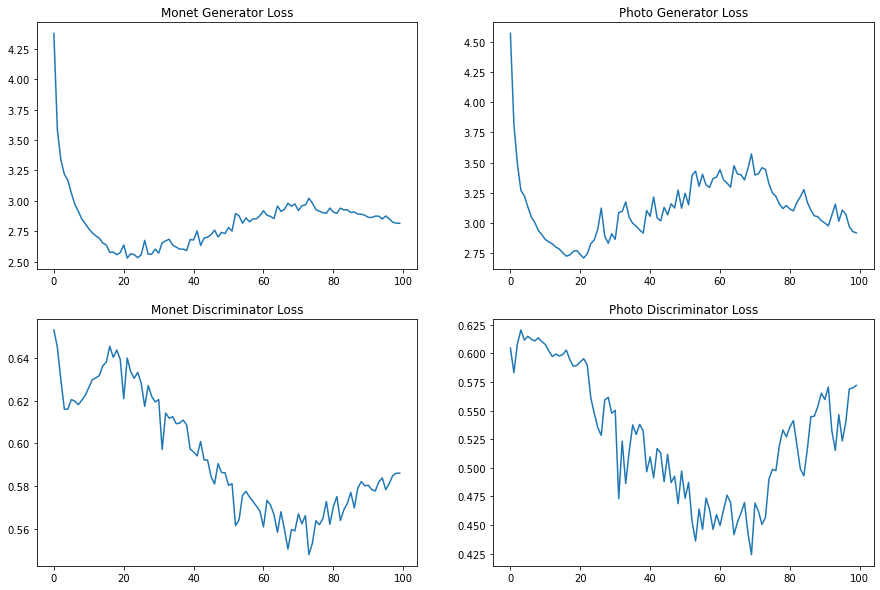

In [5]:
fig = plt.figure(figsize=(15, 10))
ax = plt.subplot(221)
ax.plot(monet_gen_loss)
ax.set_title("Monet Generator Loss")
ax = plt.subplot(222)
ax.plot(photo_gen_loss)
ax.set_title("Photo Generator Loss")
ax = plt.subplot(223)
ax.plot(monet_disc_loss)
ax.set_title("Monet Discriminator Loss")
ax = plt.subplot(224)
ax.plot(photo_disc_loss)
ax.set_title("Photo Discriminator Loss")

In [6]:
def plot_average_loss(loss_lists, normalize_loss=False):
    losses = np.zeros((len(loss_lists[0]), len(loss_lists)))
    
    for i in range(len(loss_lists)):
        losses[:, i] = loss_lists[i]
    
    if normalize_loss:
        for i in range(4):
            losses[:, i] = (losses[:, i] - losses[:, i].min()) / (losses[:, i].max() - losses[:, i].min())
    
    
    fig = plt.figure(figsize=(10, 8))
    plt.plot(np.mean(losses, axis=1))

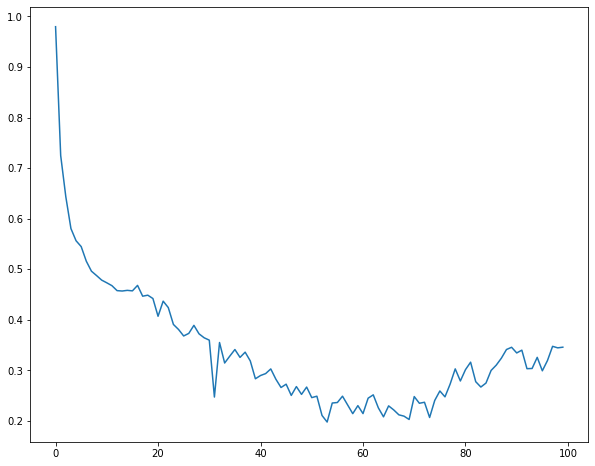

In [7]:
plot_average_loss([monet_gen_loss, photo_gen_loss, monet_disc_loss, photo_disc_loss], normalize_loss=True)